##### Goal of Notebook: Search through all stocks in SP500 and determine what sort of relationship, if any, exists between Daily Volume and Daily Volatility (Stock Price Daily High - Stock Price Daily Low) <br> 
##### Method: perform a first-pass analysis using Pearson's Correlation and the Coefficient of Determination to generate a "score." <br>
##### Result: Use this score to filter through the stocks with the highest relationship between Dailiy Volume and Daily Volatility. For the stocks that have this high score, it is worth it to pursue more complex analytical methods to determine predictive potential. <br>

In [71]:
from _ash_modules.simple_analytics import shapiro_test, remove_outliers, linear_regression_basic, pearsons_correlation_score, coefficient_of_determination_score, initial_relationship_score
from _ash_modules.data_importing import csv_import_date_as_index_col, yahoo_finance_import, csv_basic_import
from _ash_modules.data_visualization import x_y_scatter, two_axes_three_var_scatter, two_axes_two_var_scatter
from _ash_modules.dataset_cleaning import check_df_for_nulls, yahoo_finance_cleaning

import pandas as pd
import pandas as pd
import numpy as np
from IPython.display import display
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter, xlabel, ylabel, title, plot
from scipy.stats import shapiro
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [2]:
#inhibit print statements from functions when necessary
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

print("Now you see it")
with suppress_stdout():
    print("Now you don't")

Now you see it


In [3]:
path = "N:\Ashley_takengroup_server\Stock_Datasets\Tickers\SP500_tickers.csv"
sp500_tickers = csv_basic_import(path)

Takes csv path as input, imports csv file, and returns dataframe.
Reading ...
==> Took 0.0265064 seconds.


,Number,Company,Symbol
0,1,APPLE INC,AAPL
1,2,MICROSOFT CORP,MSFT
2,3,AMAZON.COM INC,AMZN
3,4,NVIDIA CORP,NVDA
4,5,ALPHABET INC CL A,GOOGL
...,...,...,...
500,501,ZIONS BANCORP NA,ZION
501,502,LINCOLN NATIONAL CORP,LNC
502,503,NEWS CORP CLASS B,NWS
503,504,DISH NETWORK CORP A,DISH


In [4]:
tickers_list = []
for ticker in sp500_tickers['Symbol']:
    ticker = ticker.replace('.','-')
    tickers_list.append(ticker)

#removing tickers that are not available on yahoo finance
tickers_list.remove('FIS')
tickers_list.remove('-')
print("Number of stocks in list: ", len(tickers_list))    

Number of stocks in list:  503


In [5]:
#creating a test list of tickers to test code
ticker_test_list = tickers_list[0:5]
print(ticker_test_list)

['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL']


In [47]:
total_score_list = []
for ticker in tickers_list:
    #print("-----------")
    #print(ticker)
    with suppress_stdout():
        df = yahoo_finance_import(ticker, 2023, 1, 1, 2023, 4, 1)
        df1 = yahoo_finance_cleaning(df)
    #two_axes_three_var_scatter(df1, 'High', 'Low', 'Volume', x_label = 'Date', y_label1 = 'High and Low', y_label2 = 'Volume', title2 = 'Daily Price Highs and Lows with Daily Volume by Date')
 
    df2 = df1.copy()
    df2['daily_volatility'] = df2['High'] - df2['Low']
    df2 = df2[['Volume', 'daily_volatility']]
    #two_axes_two_var_scatter(df2, 'daily_volatility', 'Volume', x_label = 'Date', y_label1 = 'Daily Volatility', y_label2 = 'Volume', title2 = 'Daily Volatility and Volume by Date')
    
    with suppress_stdout():
        is_normal, __, __ = shapiro_test('daily_volatility','Volume',df2)
    #x_y_scatter(df2, 'Volume', 'daily_volatility','Daily Volatility vs Volume')
    with suppress_stdout():
        df_no_outliers = remove_outliers(df2, is_normal, std_dev = 3, lower_percent = .15, upper_percent = 99.85)

    x2, y2 = df_no_outliers['Volume'], df_no_outliers['daily_volatility']
    #post_outliers_pearson = pearsonr(x2, y2)
    #print("After outliers are removed Pearson's Correlation Coefficient: ", round(post_outliers_pearson[0],2))

    #x_y_scatter(df_no_outliers, 'Volume', 'daily_volatility','Daily Volatility vs Volume')
    with suppress_stdout():
        y_pred, df_pred, pearsons_corr, cod = linear_regression_basic(df_no_outliers, 'Volume', 'daily_volatility')
        pearsons_score = pearsons_correlation_score(pearsons_corr)
        cod_score = coefficient_of_determination_score(cod)
        total_score = initial_relationship_score('Volume', 'daily_volatility', pearsons_score, cod_score)
    
    total_score_list.append(total_score)

print(total_score_list)
    

[4.7, 6.0, 6.0, 4.7, 4.7, 3.3, 3.3, 7.3, 6.0, 0.0, 4.7, 2.0, 6.0, 2.0, 4.7, 0.0, 0.0, 3.3, 0.0, 2.0, 0.0, 6.0, 3.3, 3.3, 3.3, 2.0, 0.0, 4.7, 2.0, 3.3, 0.0, 7.3, 0.0, 3.3, 0.0, 2.0, 0.0, 3.3, 7.3, 2.0, 3.3, 0.0, 2.0, 0.0, 3.3, 0.0, 4.7, 6.0, 4.7, 3.3, 4.7, 3.3, 7.3, 2.0, 2.0, 0.0, 0.0, 2.0, 0.0, 6.0, 0.0, 3.3, 3.3, 0.0, 4.7, 2.0, 3.3, 3.3, 4.7, 6.0, 4.7, 3.3, 0.0, 3.3, 4.7, 0.0, 0.0, 2.0, 4.7, 2.0, 4.7, 2.0, 0.0, 0.0, 0.0, 0.0, 3.3, 0.0, 3.3, 0.0, 2.0, 2.0, 4.7, 3.3, 0.0, 4.7, 4.7, 2.0, 0.0, 6.0, 3.3, 3.3, 7.3, 3.3, 2.0, 3.3, 3.3, 3.3, 2.0, 0.0, 4.7, 3.3, 3.3, 2.0, 2.0, 3.3, 4.7, 4.7, 3.3, 4.7, 2.0, 4.7, 2.0, 3.3, 0.0, 4.7, 0.0, 4.7, 4.7, 0.0, 2.0, 3.3, 6.0, 6.0, 2.0, 3.3, 4.7, 3.3, 3.3, 3.3, 0.0, 2.0, 3.3, 0.0, 3.3, 2.0, 0.0, 0.0, 2.0, 0.0, 4.7, 4.7, 0.0, 3.3, 0.0, 2.0, 0.0, 4.7, 0.0, 3.3, 0.0, 4.7, 0.0, 2.0, 2.0, 0.0, 2.0, 0.0, 4.7, 3.3, 3.3, 0.0, 3.3, 3.3, 2.0, 0.0, 3.3, 0.0, 2.0, 3.3, 6.0, 4.7, 4.7, 2.0, 0.0, 2.0, 3.3, 2.0, 0.0, 3.3, 3.3, 0.0, 0.0, 0.0, 2.0, 4.7, 2.0, 4.7, 0.0, 3.3,

In [48]:
all_scores = pd.DataFrame(np.column_stack([tickers_list, total_score_list]), 
                               columns=['Ticker', 'Total_Score'])
all_scores['Total_Score'] = all_scores['Total_Score'].astype(float)
display(all_scores)

,Ticker,Total_Score
0,AAPL,4.7
1,MSFT,6.0
2,AMZN,6.0
3,NVDA,4.7
4,GOOGL,4.7
...,...,...
498,ZION,8.0
499,LNC,3.3
500,NWS,0.0
501,DISH,0.0


In [70]:
score_to_beat = 8.0
df_best_scores = all_scores[all_scores['Total_Score'] >= score_to_beat]
print("Tickers with Best Scores greater than or equal to ", score_to_beat, ":")
print(f'Date Range: {df1.index.min()} to {df1.index.max()}')
display(df_best_scores)

Tickers with Best Scores greater than or equal to  8.0 :
Date Range: 2023-01-03 00:00:00-05:00 to 2023-03-31 00:00:00-04:00


,Ticker,Total_Score
401,HBAN,8.0
466,KEY,8.0
495,CMA,8.0
498,ZION,8.0


# Example Analysis with Printed Results

In [50]:
ticker = 'HBAN'
df_ex = yahoo_finance_import(ticker, 2023, 1, 1, 2023, 4, 1)
display(df_ex)

Takes ticker, start year, start month, start day, end year, end month, and end day as inputs, and returns historical data for ticker.


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,14.090992,14.120574,13.795170,13.903639,13366800,0.0,0.0
2023-01-04 00:00:00-05:00,14.051550,14.248765,14.002246,14.160018,12374200,0.0,0.0
2023-01-05 00:00:00-05:00,14.071272,14.130436,13.903639,14.061411,11069800,0.0,0.0
2023-01-06 00:00:00-05:00,14.140297,14.426258,14.071272,14.396676,12433600,0.0,0.0
2023-01-09 00:00:00-05:00,14.426257,14.426257,14.179739,14.209321,12233800,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-27 00:00:00-04:00,11.190000,11.420000,10.960000,11.120000,24809600,0.0,0.0
2023-03-28 00:00:00-04:00,11.110000,11.240000,10.940000,11.120000,14751700,0.0,0.0
2023-03-29 00:00:00-04:00,11.250000,11.360000,11.180000,11.340000,14239500,0.0,0.0


In [51]:
df1 = yahoo_finance_cleaning(df)
display(df1)

Takes data from yahoo finance IO import as input and returns reformatted dataframe


,Open,High,Low,Close,Volume
Date,,,,,
2023-01-03 00:00:00-05:00,19.421429,19.831037,19.321524,19.611246,1503600
2023-01-04 00:00:00-05:00,19.890981,20.465432,19.831038,20.350542,1526800
2023-01-05 00:00:00-05:00,20.260627,20.290597,19.766099,19.940931,1606700
2023-01-06 00:00:00-05:00,20.320569,20.910005,20.240645,20.850063,1408300
2023-01-09 00:00:00-05:00,20.979939,21.499443,20.810101,21.269663,1210200
...,...,...,...,...,...
2023-03-27 00:00:00-04:00,25.900000,26.299999,25.510000,25.879999,1699000
2023-03-28 00:00:00-04:00,25.879999,26.129999,25.750000,25.870001,935200
2023-03-29 00:00:00-04:00,26.200001,26.510000,26.070000,26.270000,925300


Takes dataframe, y_var1, y_var2, y_var3, x_label, y_label1, y_label2, and title as inputs, and returns plot with two y axes.
two_axes_three_var_plot(df, y_var1, y_var2, y_var3, x_label = 'x_label', y_label1 = 'Primary Y Axis', y_label2 = 'Secondary Y Axis', title = 'Plot of Y1, Y2, and Y3 with X')


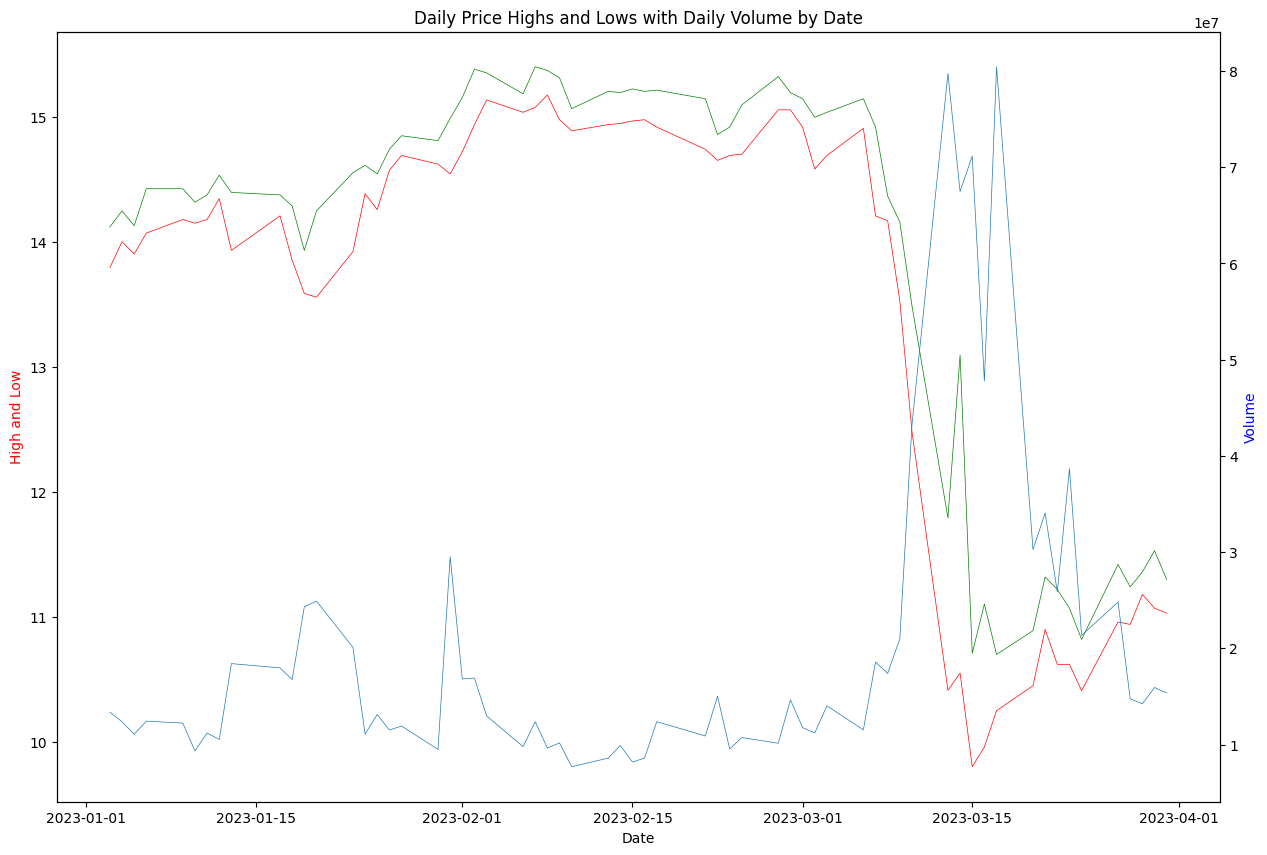

In [52]:
two_axes_three_var_scatter(df_ex, 'High', 'Low', 'Volume', x_label = 'Date', y_label1 = 'High and Low', y_label2 = 'Volume', title2 = 'Daily Price Highs and Lows with Daily Volume by Date')

In [53]:
#daily volatility = high - low
df_ex2 = df_ex.copy()
df_ex2 = df_ex2[['High','Low','Volume']]

df_ex2['daily_volatility'] = df_ex2['High'] - df_ex2['Low']
df_ex2 = df_ex2.drop(['High', 'Low'], axis = 1)
df_ex2.head()

,Volume,daily_volatility
Date,,
2023-01-03 00:00:00-05:00,13366800,0.325404
2023-01-04 00:00:00-05:00,12374200,0.246518
2023-01-05 00:00:00-05:00,11069800,0.226796
2023-01-06 00:00:00-05:00,12433600,0.354986
2023-01-09 00:00:00-05:00,12233800,0.246518


In [54]:
x1, y1 = df_ex2['Volume'], df_ex2['daily_volatility']
initial_pearson = pearsonr(x1, y1)
print("Initial Pearson's Correlation Coefficient: ", round(initial_pearson[0],2))

Initial Pearson's Correlation Coefficient:  0.74


Takes dataframe, y_var1, y_var2, x_label, y_label1, y_label2, and title as inputs, and returns plot with two y axes.
two_axes_two_var_plot(df, y_var1, y_var2, x_label = 'x_label', y_label1 = 'Primary Y Axis', y_label2 = 'Secondary Y Axis', title2 = 'Plot of Y1 and Y2 with X')


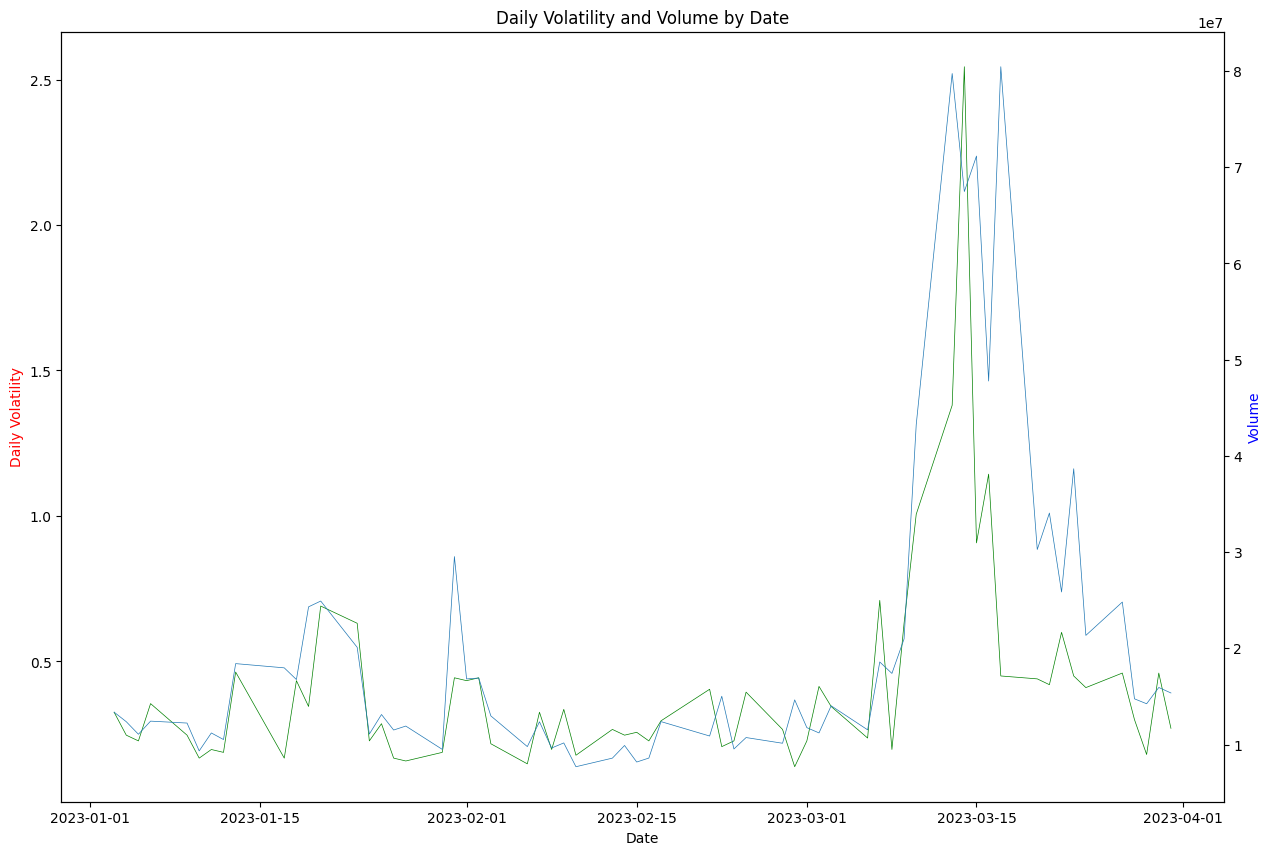

In [55]:
two_axes_two_var_scatter(df_ex2, 'daily_volatility', 'Volume', x_label = 'Date', y_label1 = 'Daily Volatility', y_label2 = 'Volume', title2 = 'Daily Volatility and Volume by Date')

Shapiro-Wilk Test for Normal Distribution
Returns is_normal as boolean, x_shapiro, y_shapiro
daily_volatility is not normally distributed.
Volume is not normally distributed.


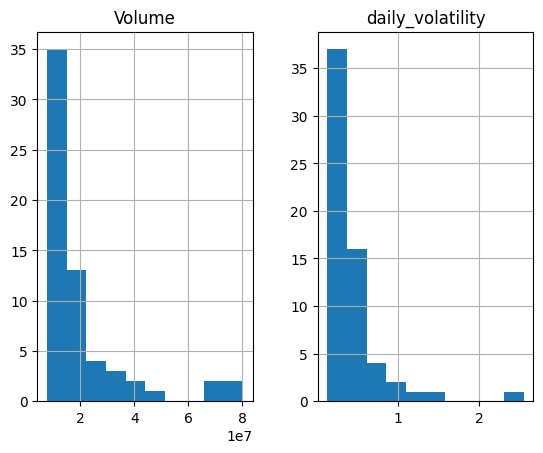

In [56]:
is_normal, __, __ = shapiro_test('daily_volatility','Volume',df_ex2)
df_ex2.hist();

Takes dataframe, x and y column names and title as inputs, and returns scatter plot.
x_y_scatter(df, x_col, y_col, title = 'XY Plot of X vs Y')


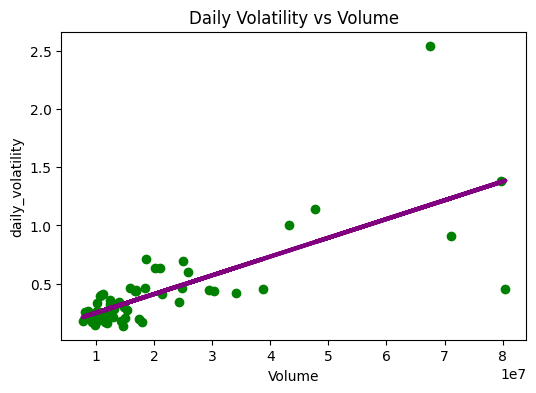

In [57]:
x_y_scatter(df_ex2, 'Volume', 'daily_volatility','Daily Volatility vs Volume')

Removes Outliers depending on normal or non-normal distribution and returns dataframe with outliers removed.
Input: remove_outliers(df, is_normal, std_dev = 3, lower_percent = 2.5, upper_percent = 97.5)
Distribution is not normal and outliers will be removed using the IQR method.
Number of rows before: 62. Number of rows after: 58. Number of rows removed: 4
Percent of rows removed: 6.45%


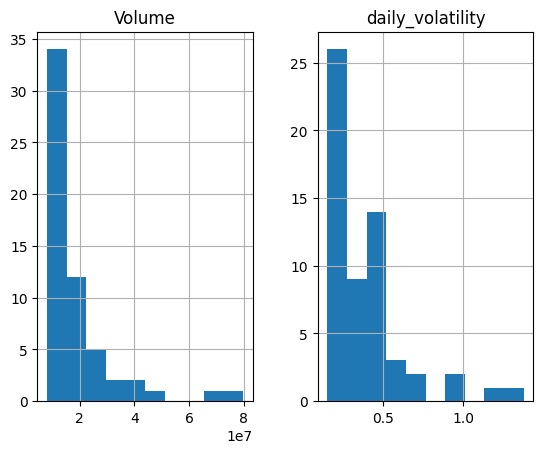

In [58]:
df_no_outliers2 = remove_outliers(df_ex2, is_normal, std_dev = 3, lower_percent = .15, upper_percent = 99.85)
df_no_outliers2.hist();

In [59]:
x2_1, y2_1 = df_no_outliers2['Volume'], df_no_outliers2['daily_volatility']
post_outliers_pearson1 = pearsonr(x2_1, y2_1)
print("After outliers are removed Pearson's Correlation Coefficient: ", round(post_outliers_pearson1[0],2))

After outliers are removed Pearson's Correlation Coefficient:  0.85


Takes dataframe, x and y column names and title as inputs, and returns scatter plot.
x_y_scatter(df, x_col, y_col, title = 'XY Plot of X vs Y')


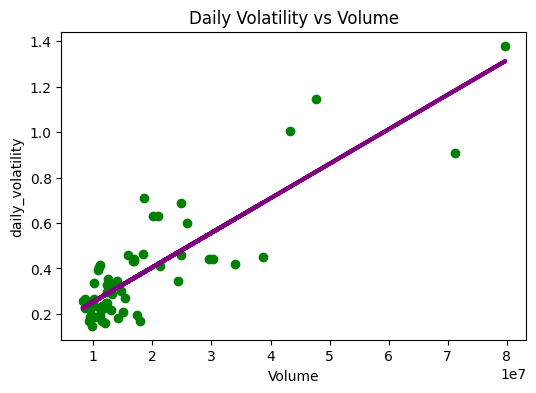

In [60]:
x_y_scatter(df_no_outliers2, 'Volume', 'daily_volatility','Daily Volatility vs Volume')

In [61]:
y_pred1, df_pred1, pearsons_corr1, cod1 = linear_regression_basic(df_no_outliers2, 'Volume', 'daily_volatility')

Takes dataframe, x and y column names, and returns linear regression y_pred, df_pred with y_pred added as a column, pearsons_corr, cod
linear_regression_basic(df, x_col, y_col)
Results:

slope: (1.5194620247965563e-08, 10)
intercept: 0.101
Equation: y = 1.52e-08x + 0.101
Pearsons's r^2 is:  0.854
Coefficient of Determination R^2 is:  0.729


In [62]:
pearsons_score1 = pearsons_correlation_score(pearsons_corr1)

Note: Must run linear regression first
Takes correlation coefficient from linear regression model and returns the correlation score.
Pearson's Correlation between var1 and var2 is:  0.854
This is a very strong association.
Correlation Score (33% of total score):  3.333


In [63]:
cod_score1 = coefficient_of_determination_score(cod1)

Note: Must run linear regression first
Takes COD score from linear regression model and returns the COD score.
Coefficient of Determination is: 0.729
50% - 74% of the variation in var2 is explained by the variation in var1.
COD Score (67% of total score):  4.67


In [64]:
total_score1 = initial_relationship_score('Volume', 'daily_volatility', pearsons_score1, cod_score1)

Takes pearsons correlation score and coefficient of determination score as inputs, and returns the initial relationship total score.
Total Initial Relationship Score between Volume and daily_volatility: 8.0
This is a strong score.
